Predict survivors on the Titanic using k-nearest neighbour

In [13]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.neighbors import KNeighborsClassifier #the object class we need
from sklearn.metrics import confusion_matrix  #to construct confusion  matrix


In [14]:
#load datafile and parse to pandas
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN


In [15]:
#getting 5 independent variables to predict survival chances
#selecting sex, age, class, cabin, sibsp and parch as independent variables 
#perhaps will combine sibsp and parch as family but first see if they are compatible in the analysis
df = titanic[["Sex", "Age", "Pclass", "SibSp", "Parch", "Survived"]]
df.head(3)

,Sex,Age,Pclass,SibSp,Parch,Survived
0,male,22.0,3,1,0,0
1,female,38.0,1,1,0,1
2,female,26.0,3,0,0,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


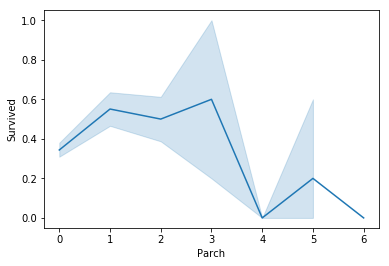

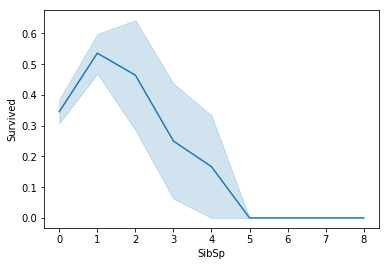

In [16]:
#line plots to see how these 2 variables related to survival
sns.lineplot(x=df["Parch"], y = df["Survived"], data = df)
plt.show()

sns.lineplot(x=df["SibSp"], y = df["Survived"], data = df)
plt.show()

In [17]:
#combine parent children and siblings spouses to create new column for family
df["Family"] = df["Parch"]+df["SibSp"]
df.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sex,Age,Pclass,SibSp,Parch,Survived,Family
0,male,22.0,3,1,0,0,1
1,female,38.0,1,1,0,1,1
2,female,26.0,3,0,0,1,0


In [18]:
#dropping parch and sibsp from dataframe to avoid duplication
df = df.drop(["Parch", "SibSp"], axis=1)
df.head(3)

,Sex,Age,Pclass,Survived,Family
0,male,22.0,3,0,1
1,female,38.0,1,1,1
2,female,26.0,3,1,0


In [19]:
#creating dummy variables for sex so it can be included in model
dummies = pd.get_dummies(df['Sex'])
df = pd.concat([df, dummies], axis=1) 
df.head(3)

,Sex,Age,Pclass,Survived,Family,female,male
0,male,22.0,3,0,1,0,1
1,female,38.0,1,1,1,1,0
2,female,26.0,3,1,0,1,0


In [20]:
#dropping null values as the final step of pre-processing the data
df= df.dropna()
df.head(3)

,Sex,Age,Pclass,Survived,Family,female,male
0,male,22.0,3,0,1,0,1
1,female,38.0,1,1,1,1,0
2,female,26.0,3,1,0,1,0


In [21]:
#spliting the dataframe into training and test sets
X = df[['female', 'Family', 'Pclass', 'Age']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['Survived'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #store sets into different variables

In [22]:
#using knn model to predict survivors on the traning data
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8046511627906977

81% of survivors predicted accurately

In [27]:
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[110,  24],
       [ 18,  63]], dtype=int64)

In [25]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=["not_survived", "survived"], columns = ["not_survived_p", "survived_p"]) 
conf_matrix

,not_survived_p,survived_p
not_survived,110,24
survived,18,63


$recall = \frac{110}{110+24} =.82$
 
$precision = \frac{110}{110+18} =.86$

The prediction for knn algorithm has a higher precision than recall. 
This means that, with this model, 18 survivors were wrongly identified as casualties.
On the other hand, an even greater number who died (24) were wrongly identified as survivors.

False positives = 18%
False negatives = 14%